In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

In [3]:
df = pd.read_csv('Data/vehicles.csv')

In [4]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423852,7184919761,https://duluth.craigslist.org/cto/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,1600,2006.0,hyundai,sonata,fair,6 cylinders,...,fwd,NaN,sedan,blue,https://images.craigslist.org/00E0E_8o5RKLUz3o...,Motor runs and drives good. Transmission shift...,NaN,mn,46.8348,-92.0742
423853,7184844576,https://duluth.craigslist.org/cto/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,...,4wd,full-size,SUV,green,https://images.craigslist.org/00G0G_BT0Ha3X736...,"2 owner 0 rust not from here... Leather ,roof ...",NaN,mn,46.9369,-91.9325
423854,7184805809,https://duluth.craigslist.org/cto/d/duluth-94-...,duluth / superior,https://duluth.craigslist.org,700,1994.0,ford,f-150,fair,6 cylinders,...,rwd,NaN,NaN,green,https://images.craigslist.org/00L0L_2MgECwYWhp...,I'm selling this beautiful old pickup that I j...,NaN,mn,46.7715,-92.1279
423855,7184791927,https://duluth.craigslist.org/ctd/d/duluth-199...,duluth / superior,https://duluth.craigslist.org,3800,1999.0,lincoln,town car,excellent,8 cylinders,...,rwd,NaN,sedan,NaN,https://images.craigslist.org/00q0q_6msyGUIqK3...,1999 *** Lincoln Town Car 4dr Sdn Signature Se...,NaN,mn,46.8433,-92.2550


In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [6]:
df = df.drop(columns=['id', 'url', 'region', 'region_url', 'county', 'image_url', 'county','state','lat','long','vin','size','type','description'])

In [7]:
df['model'].value_counts()

f-150                             6073
silverado 1500                    3878
escape                            3208
camry                             2906
1500                              2898
                                  ... 
2017 Mirai Hydrogen Fuel Cell!       1
camry 2010se                         1
odyssey van ex-                      1
Equinox LT                           1
rlx advance pkg                      1
Name: model, Length: 27042, dtype: int64

In [8]:
counts = df['model'].value_counts()
to_remove = counts[counts <= 10].index
df = df[~df.model.isin(to_remove)]

In [9]:
df['model'].value_counts()

f-150                 6073
silverado 1500        3878
escape                3208
camry                 2906
1500                  2898
                      ... 
nova ss                 11
z4 3.0si                11
town & country tou      11
sorento lx v6           11
ats luxury              11
Name: model, Length: 3071, dtype: int64

In [10]:
df.shape

(372656, 12)

In [11]:
df['cylinders'].value_counts()

4 cylinders     60030
6 cylinders     58322
8 cylinders     43692
5 cylinders      1238
10 cylinders      655
other             534
3 cylinders       286
12 cylinders       54
Name: cylinders, dtype: int64

In [12]:
df.drop(df[df['cylinders'] == 'other'].index, inplace = True) 

In [13]:
df['cylinders'].value_counts()

4 cylinders     60030
6 cylinders     58322
8 cylinders     43692
5 cylinders      1238
10 cylinders      655
3 cylinders       286
12 cylinders       54
Name: cylinders, dtype: int64

In [14]:
df['title_status'].value_counts()

clean         266601
rebuilt         5136
salvage         2697
lien            1566
missing          427
parts only       156
Name: title_status, dtype: int64

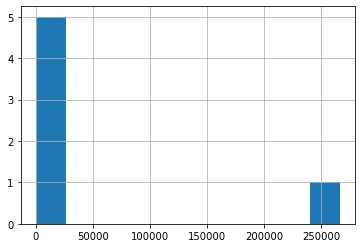

In [15]:
df['title_status'].value_counts().hist()

In [16]:
df = df.drop(df.loc[df['title_status'] == 'salvage'].index)
df = df.drop(df.loc[df['title_status'] == 'parts only'].index)
df = df.drop(df.loc[df['title_status'] == 'missing'].index)

In [17]:
df['title_status'].value_counts()

clean      266601
rebuilt      5136
lien         1566
Name: title_status, dtype: int64

In [18]:
df['transmission'].value_counts()

automatic    246788
manual        17179
other          9275
Name: transmission, dtype: int64

In [19]:
df.drop(df[df['transmission'] == 'other'].index, inplace = True) 

In [20]:
df['transmission'].value_counts()

automatic    246788
manual        17179
Name: transmission, dtype: int64

In [21]:
df['drive'].value_counts()

4wd    80488
fwd    75197
rwd    30823
Name: drive, dtype: int64

In [22]:
df['paint_color'].value_counts()

white     45502
black     35116
silver    26767
blue      18554
red       17625
grey      17401
custom     5350
green      4690
brown      3735
yellow     1262
orange     1099
purple      537
Name: paint_color, dtype: int64

In [23]:
df.drop(df[df['paint_color'] == 'custom'].index, inplace = True) 

In [24]:
df['paint_color'].value_counts()

white     45502
black     35116
silver    26767
blue      18554
red       17625
grey      17401
green      4690
brown      3735
yellow     1262
orange     1099
purple      537
Name: paint_color, dtype: int64

In [25]:
df['paint_color'] == 'Nan'

1         False
2         False
3         False
5         False
6         False
          ...  
423852    False
423853    False
423854    False
423855    False
423856    False
Name: paint_color, Length: 354217, dtype: bool

In [26]:
df.shape

(354217, 12)

In [27]:
df['fuel'].value_counts()

gas         229835
diesel       17773
other         7891
hybrid        2906
electric       480
Name: fuel, dtype: int64

In [28]:
df.drop(df[df['fuel'] == 'other'].index, inplace = True) 

In [29]:
df['fuel'].value_counts()

gas         229835
diesel       17773
hybrid        2906
electric       480
Name: fuel, dtype: int64

In [30]:
df['condition'].value_counts()

excellent    68455
good         43931
like new     13535
fair          4955
new            713
salvage        199
Name: condition, dtype: int64

In [31]:
df['manufacturer'].value_counts()

ford               47278
chevrolet          37529
toyota             20638
honda              15760
nissan             14169
jeep               11561
gmc                 9767
dodge               9699
ram                 9384
hyundai             7242
subaru              6307
kia                 5755
bmw                 5542
volkswagen          5401
chrysler            4927
mercedes-benz       4639
buick               3609
cadillac            3459
lexus               2936
mazda               2835
audi                2213
acura               2154
lincoln             2037
pontiac             1866
infiniti            1676
mitsubishi          1394
volvo               1323
mercury             1073
mini                 973
rover                893
saturn               847
jaguar               507
fiat                 373
tesla                134
alfa-romeo            65
harley-davidson       47
datsun                46
ferrari               14
land rover             8
aston-martin           2


In [32]:
df['year'].value_counts()

2017.0    23466
2013.0    16936
2015.0    16874
2014.0    16862
2016.0    16400
          ...  
1945.0        1
1922.0        1
1921.0        1
1920.0        1
1913.0        1
Name: year, Length: 102, dtype: int64

In [33]:
df['price'].value_counts()

0             29155
3500           3246
8995           3163
7995           3048
6995           3007
              ...  
16967             1
16876             1
6609              1
6732              1
2039470154        1
Name: price, Length: 14597, dtype: int64

In [34]:
df.drop(df[df['price'] == 0].index, inplace = True) 

In [35]:
df['price'].value_counts()

3500     3246
8995     3163
7995     3048
6995     3007
5995     2980
         ... 
14538       1
3730        1
42631       1
17819       1
19255       1
Name: price, Length: 14596, dtype: int64

In [36]:
df.shape

(317171, 12)

In [37]:
df = df.dropna()
df.shape

(68847, 12)

In [38]:
df['year'] = df['year'].astype(int)

In [39]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,paint_color
1,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,grey
2,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,blue
5,13995,2012,ford,f-150,good,6 cylinders,gas,188406.0,clean,automatic,4wd,grey
6,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124.0,clean,automatic,4wd,grey
7,8995,2011,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,white
...,...,...,...,...,...,...,...,...,...,...,...,...
423843,29500,2015,toyota,tacoma trd off road,like new,6 cylinders,gas,75000.0,clean,automatic,4wd,blue
423845,1600,2004,volvo,xc70,excellent,5 cylinders,gas,292255.0,clean,automatic,4wd,blue
423852,1600,2006,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,blue
423853,9000,2003,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,green


In [40]:
file = open('Data/vehicles_new', 'wb')
pk.dump(df, file)
file.close()